In [1]:
import sys
sys.path.append('/root/code/LLM/anchor-function-new')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D
import json
import torch
import torch.utils.data as Data
from torch import nn, optim
import numpy as np
import shutil
from model import *
from utils import *
from data import *
import argparse
from collections import Counter
from data_generator.create_data import get_data, create_dataset
from test_seq_len import get_test_acc

# Fig 1

In [2]:
import numpy as np
working_dir_LSTM=r'/root/code/LLM/anchor-function-new/result/GPT_composition_inverse'
acc_test_unmask_his_mean_all=[]
acc_test_unmask_his_std_all=[]
nlnh_list=[(4,4), (6,5),(8,6),(10,7)]
# nlnh_list=[(10,7)]

seed_lst=[1]
acc_lst=[]
seq_len_lst=[]
acc_lst_34=[]
seq_len_34_lst=[]
for (nl, nh) in nlnh_list:
    working_dir_new=working_dir_LSTM+'/nl_'+str(nl)+'_nh_'+str(nh)+'_sl_9_mode_short'
    working_dir_new_list=os.listdir(working_dir_new)
    for seed in seed_lst:
        for working_dir_new_new in working_dir_new_list:

            if f'seed_{seed}-N_20000-lr_0.0001' in working_dir_new_new:
                print(working_dir_new_new)
                args=read_json_data(os.path.join(working_dir_new,working_dir_new_new,'config.json'))

                args = argparse.Namespace(**args)
                args.device_rank='0'
                args.dropout_pro=0.0

                acc_34, seq_len_34=get_test_acc(args, 'test_34')
                acc, seq_len=get_test_acc(args, 'test')
                acc_lst.append(acc)
                seq_len_lst.append(seq_len)
                acc_lst_34.append(acc_34)
                seq_len_34_lst.append(seq_len_34)









seed_1-N_20000-lr_0.0001_20231108_022338


/root/code/LLM/anchor-function-new/data_generator/create_data.py:37: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:261.)
  decoder_inputs = torch.tensor([d["decoder_input"] for d in batch], dtype=torch.long)


input: [32 92 29 95 25 26  3  4 99]
output: [28 28 28 28 28 28 22 22 22]
input: [49  3  4 21 96 91 26 45 70]
output: [13 45 45 45 45 45 45 45 45]
input: [38 31 48 49 34 70 55  3  4]
output: [34 34 34 34 34 34 34 51 51]
input: [33 85  3  4 29 27 83 81 42]
output: [13 13 81 81 81 81 81 81 81]
input: [20 71  3  4 80 28 33 67 92]
output: [13 13 67 64 67 67 67 67 67]
input: [90 41 69 80  3  4 77 23 88]
output: [13 37 37 37 76 76 76 76 76]
input: [63 22  3  4 96 46 72 61 35]
output: [59 59 18 18 18 18 18 18 18]
input: [45 27 46 45 46  3  4 42 29]
output: [44 44 44 44 44 42 42 42 42]
input: [43 47 57 77 58 28 27  3  4]
output: [13 13 37 13 13 13 13 23 23]
input: [30 43 23  3  4 35 45 91 94]
output: [20 13 13 19 19 19 19 19 19]
input: [77  3  4 43 75 85 97 23 20]
output: [67 73 73 73 73 73 73 73 73]
input: [ 97  26  72  90  22 103   3   4  96]
output: [13 13 13 13 13 13 99 99 96]
input: [ 95  27  97  92  95 103   3   4  96]
output: [44 13 13 13 44 44 99 99 96]
input: [50 56 27 65 25  3  4 88 7

In [3]:
acc_lst=np.array(acc_lst).reshape(-1,4)
seq_len_lst_array=np.array(seq_len_lst).reshape(-1,4)/15
seq_len_lst_mean=np.mean(seq_len_lst_array,axis=1)
seq_len_lst_std=np.std(seq_len_lst_array,axis=1)
acc_lst_mean=np.mean(acc_lst,axis=1)
acc_lst_max=np.max(acc_lst,axis=1)
acc_lst_min=np.min(acc_lst,axis=1)
acc_lst_std=np.std(acc_lst,axis=1)

acc_lst_34=np.array(acc_lst_34).reshape(-1,4)
seq_len_34_lst_array=np.array(seq_len_34_lst).reshape(-1,4)
seq_len_34_lst_mean=np.mean(seq_len_34_lst_array,axis=1)
seq_len_34_lst_std=np.std(seq_len_34_lst_array,axis=1)
acc_lst_34_mean=np.mean(acc_lst_34,axis=1)
acc_lst_34_max=np.max(acc_lst_34,axis=1)
acc_lst_34_min=np.min(acc_lst_34,axis=1)

ValueError: cannot reshape array of size 1 into shape (4)

In [ ]:
seq_len_lst_mean

array([4.65, 1.25, 1.  , 1.  ])

In [ ]:
acc_lst_34_mean

array([0.9245, 0.992 , 0.9825, 1.    ])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        ):
    # 设置子图线宽
    plt.rcParams['lines.linewidth'] = lw
    
    # 子图点大小
    plt.rcParams['lines.markersize'] = ms
    
    # 子图间距与位置  w:左右 h:上下
    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)

    # 字体大小
    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs
    # 子图坐标轴宽度
    plt.rcParams['axes.linewidth'] = axlw
    # 子图坐标轴刻度宽度
    plt.rcParams['xtick.major.width'] = axlw
    plt.rcParams['ytick.major.width'] = axlw
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.minor.size'] = 0
    plt.rcParams['ytick.minor.size'] = 0
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.major.pad'] = major_tick_len
    plt.rcParams['ytick.major.pad'] = major_tick_len
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.pad'] = 5
    plt.rcParams['ytick.minor.pad'] = 5
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['legend.frameon'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['figure.dpi'] = dpi
    # 子图坐标轴刻度标签位置
    plt.rcParams['savefig.dpi'] = dpi



def get_color_list(n_colors, cmap='viridis', color_min=0.5, color_max=1, invert=False):
    r'''
        从cmap中取出n_colors个颜色
        cmap: 颜色映射
            纯色可选：蓝'Blues', 绿'Greens', 红'Reds', 橙'Oranges', 灰'Greys', 紫'Purples'
            渐变色可选：经典'viridis', 'plasma', 'inferno', 'magma', 红白蓝'seismic'
        color_min: 颜色映射最小值，纯色建议从0.5开始，渐变色建议从0.0开始
        color_max: 颜色映射最大值
        invert: 是否反转颜色，默认从浅到深，invert=True时从深到浅
    '''
    colormap = plt.cm.get_cmap(cmap)
    if invert:
        color_list = [colormap(i) for i in np.linspace(color_max, color_min, n_colors)]
    else:
        color_list = [colormap(i) for i in np.linspace(color_min, color_max, n_colors)]
    return color_list


def get_color_groups(n_group, n_colors, cmap_list=None, color_min=0.5, color_max=1, invert=False):
    r'''
        返回一组颜色，每组颜色有n_colors个
        cmap_list: 颜色映射列表，如果为None，则使用默认的颜色映射
    '''
    if cmap_list is None:
        cmap_list = ['Blues', 'Reds', 'Greens', 'Oranges', 'Greys', 'Purples', 'YlOrBr', 'PuBuGn', 'BuPu']
        
    color_groups = [get_color_list(n_colors, cmap=cmap_list[i], color_min=color_min, color_max=color_max, invert=invert) for i in range(n_group)]
    
    return color_groups


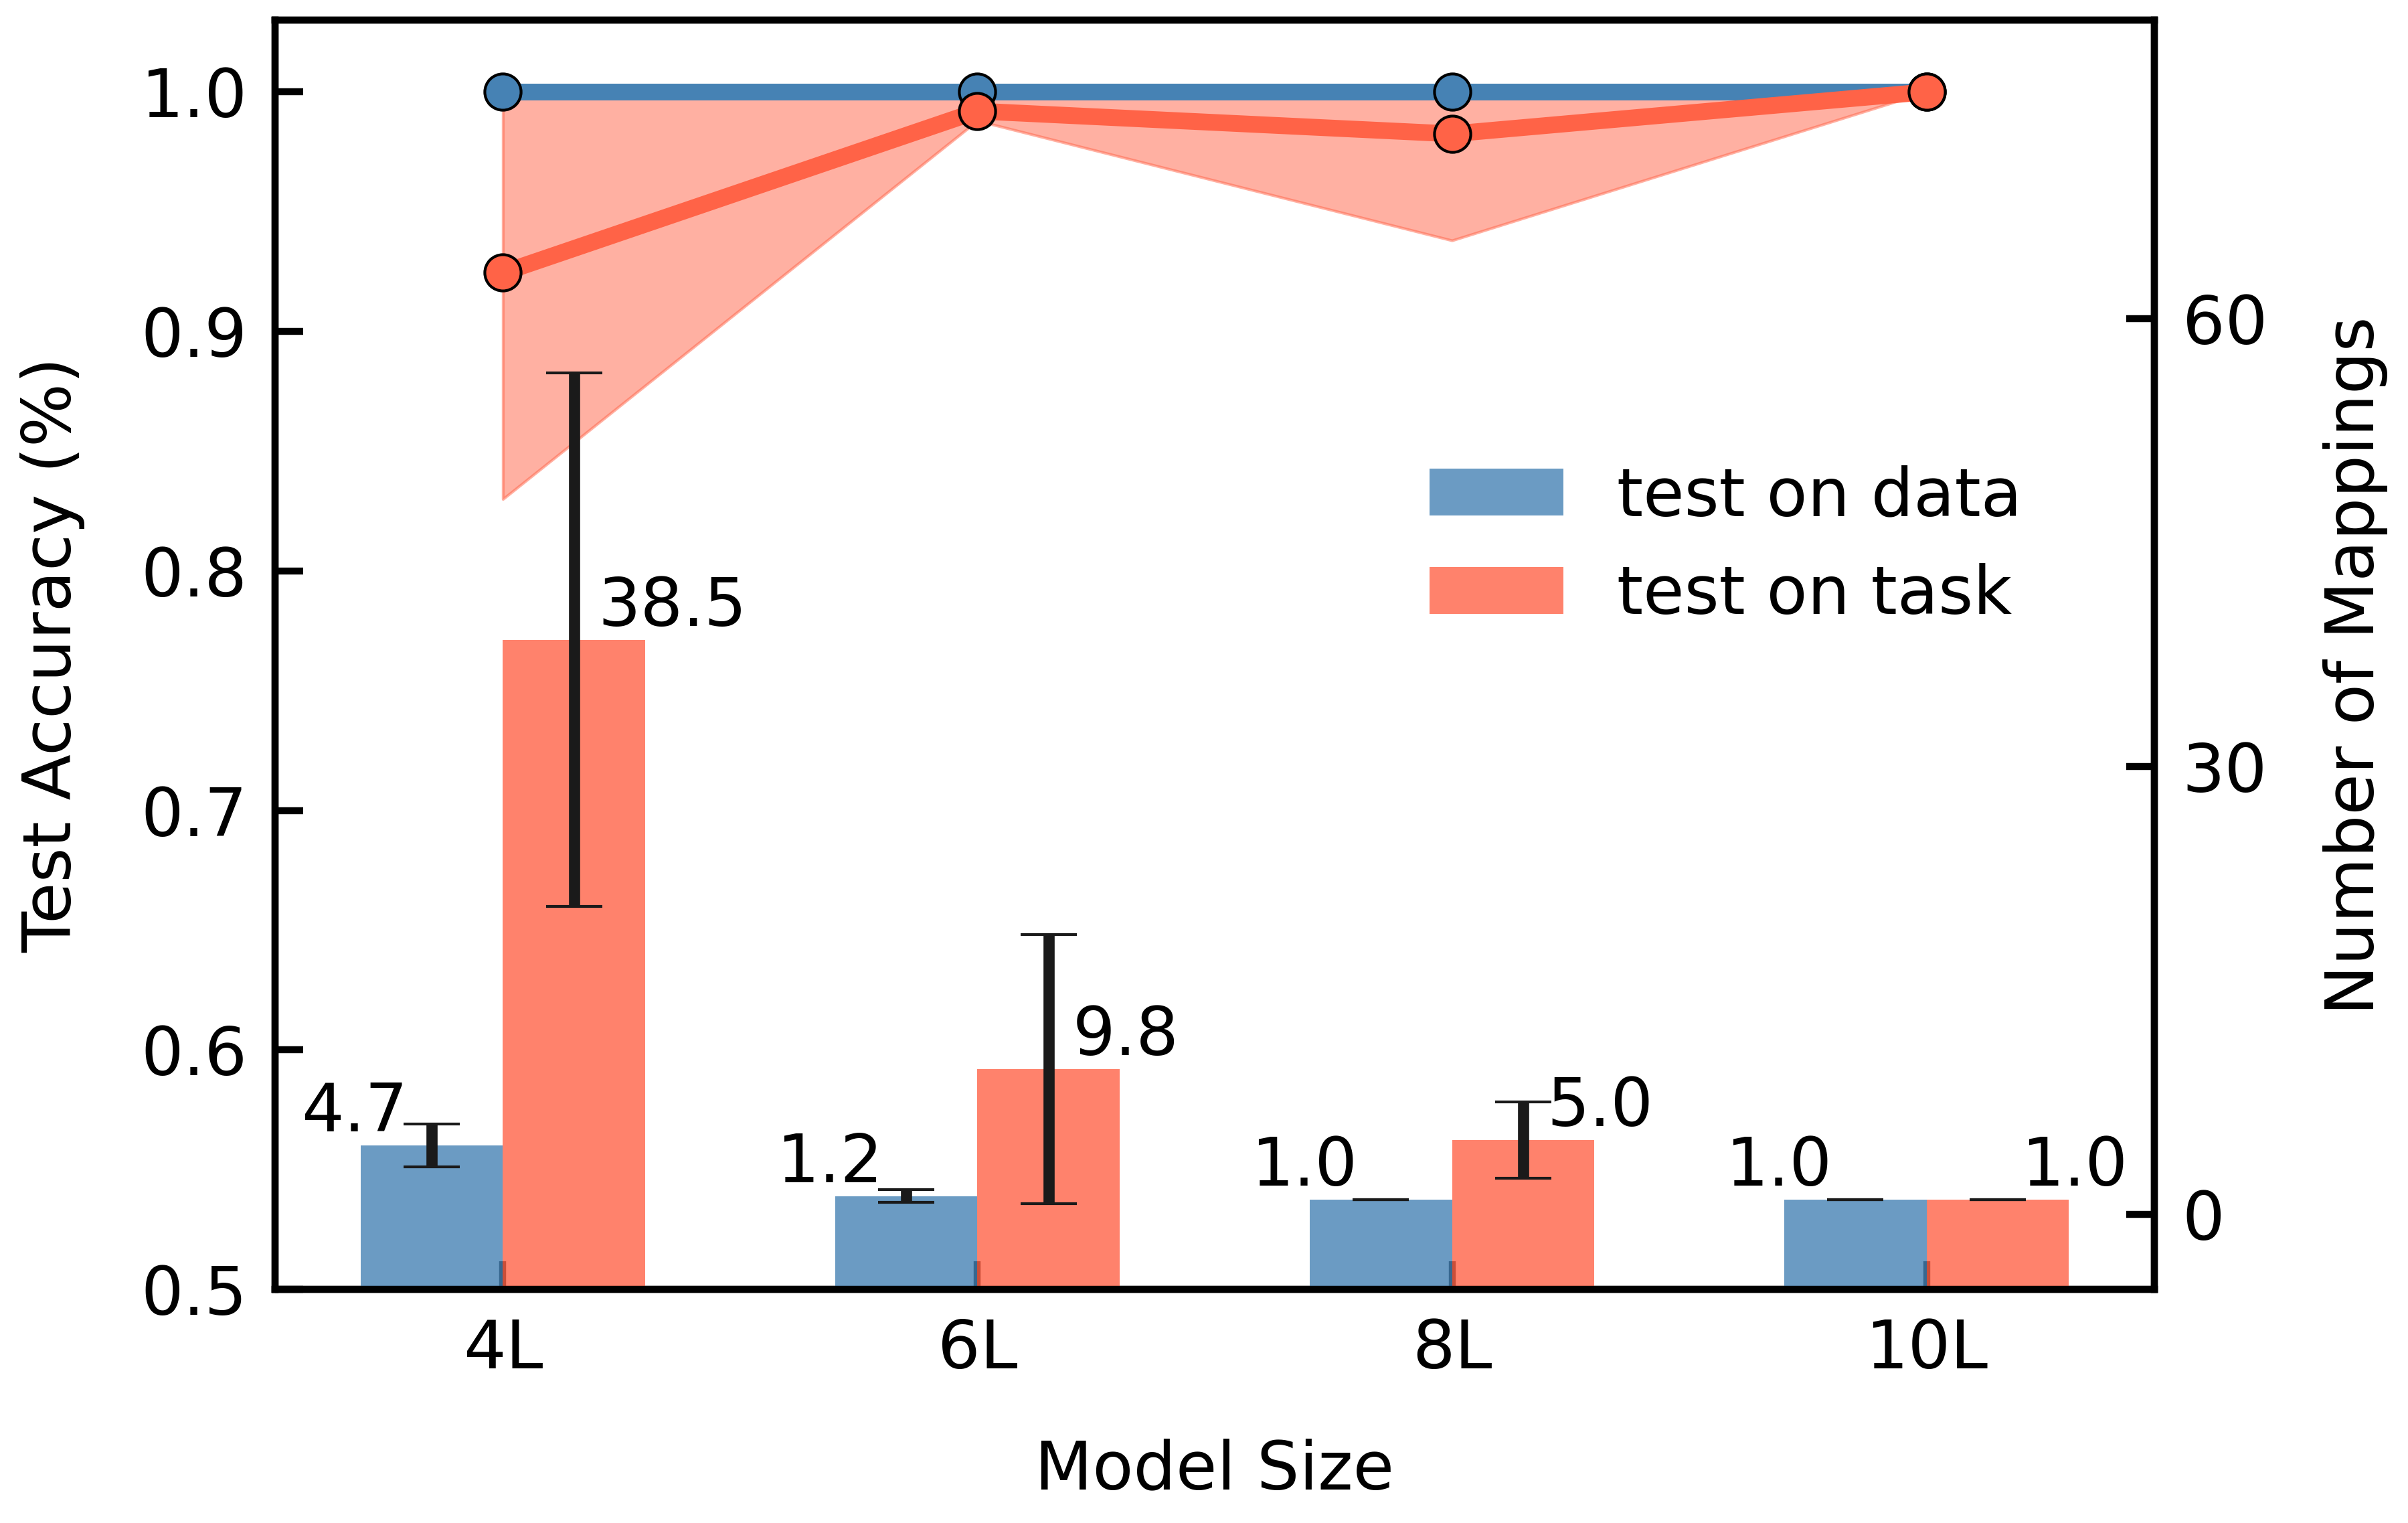

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)

ax = plt.gca()
handler_map = {}
color_list = ['tomato', 'steelblue', 'goldenrod', 'skyblue']
# color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
l1, = ax.plot(range(len(nlnh_list)), acc_lst_mean, color=color_list[1], 
        marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
ax.fill_between(range(len(nlnh_list)), acc_lst_max,
                acc_lst_min, alpha=0.5, color=color_list[1])

l1, = ax.plot(range(len(nlnh_list)), acc_lst_34_mean, color=color_list[0], 
        marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)
ax.fill_between(range(len(nlnh_list)), acc_lst_34_max,
                acc_lst_34_min, alpha=0.5, color=color_list[0])
# l2, = ax.plot(np.arange(0, 1.05, 0.1), test_23_lst_mean, label=f'prompt: 23', color=color_list[1], 
#         marker = 'D', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
# # ax.fill_between(np.arange(0, 1.05, 0.1), test_23_lst_mean+test_23_lst_std,
# #                 test_23_lst_mean-test_23_lst_std, alpha=0.5, color=color_list[1])
# l3, = ax.plot(np.arange(0, 1.05, 0.1), test_123_lst_mean, label=f'prompt: 123',  color=color_list[2], 
#                 marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=6)    
# # ax.fill_between(np.arange(0, 1.05, 0.1), test_123_lst_mean+test_123_lst_std,
# #                 test_123_lst_mean-test_123_lst_std, alpha=0.5, color=color_list[2])  

handler_map[l1] = HandlerLine2D(numpoints=2)
# handler_map[l2] = HandlerLine2D(numpoints=2)
# handler_map[l3] = HandlerLine2D(numpoints=2)
handles = [l1]
ax.set_ylim(0.5, 1.03)

# 如果存在mask的数据，则绘制mask数据的acc
# if plot_mask:
#         l3, = ax.plot(acc_epoch_his, acc_train_mask_his, label=f'train (mask)', lw=2, color=color_list[2], 
#                 marker = '^', markersize=9, markeredgewidth=1, markeredgecolor='black', zorder=6)        
#         l4, = ax.plot(acc_epoch_his, acc_test_mask_his, label=f'test  (mask)', color=color_list[3], 
#                 marker = '^', markersize=13, markeredgewidth=1, markeredgecolor='black', zorder=5)
        
#         handler_map[l3] = HandlerLine2D(numpoints=2)
#         handler_map[l4] = HandlerLine2D(numpoints=2)
#         handles.extend([l3, l4])

ax.set_xlabel('Model Size', labelpad=20, fontsize=24)
ax.set_ylabel('Test Accuracy (%)', labelpad=20, fontsize=24)

ax.set_xticks([0,1,2,3], ['4L', '6L', '8L', '10L'])
ax.set_yticks([0.6,0.8,1.0], ['60', '80', '100'])
ax_twin=ax.twinx()
# bars=ax_twin.bar(range(4), seq_len_lst_mean, color=color_list[1], alpha=0.5, width=0.4)
# seq_len_lst = seq_len_lst

# 在每个条形上添加具体的值
# for i, values in enumerate(seq_len_lst_array):
#     y = values
#     x = [i-0.15, i-0.05, i+0.05, i+0.15] 
#     ax_twin.plot(x, y,'o', color=color_list[1],  markersize=13, markeredgewidth=1, markeredgecolor='black',)


bars=ax_twin.bar(np.arange(-0.15, 3.85, 1), seq_len_lst_mean+5, bottom=-5,yerr = seq_len_lst_std,error_kw = {'ecolor' : '0.1', 'capsize' :10, 'elinewidth' :4 }, color=color_list[1], alpha=0.8, width=0.3, label='test on data')
bars_2=ax_twin.bar(np.arange(0.15, 4.15, 1), seq_len_34_lst_mean+5, bottom=-5,yerr = seq_len_34_lst_std,error_kw = {'ecolor' : '0.1', 'capsize' :10,  'elinewidth' :4  }, color=color_list[0], alpha=0.8, width=0.3, label='test on task')
for bar in bars:
    height = bar.get_height()
    ax_twin.text(bar.get_x() + bar.get_width() / 2-0.05, height-5,
                 f'{height-5:.1f}', ha='right', va='bottom')
for bar in bars_2:
    height = bar.get_height()
    ax_twin.text(bar.get_x() + bar.get_width() / 2 +0.05, height-5,
                 f'{height-5:.1f}', ha='left', va='bottom')
ax_twin.set_ylim(-5, 80)
ax_twin.set_yticks([0, 30, 60])
ax_twin.set_yticklabels([0, 30, 60])
# ax_twin.set_yscale('log')

# ax_twin.axhline(0, color='black', linestyle='--', linewidth=2)

ax_twin.set_ylabel('Number of Mappings ', labelpad=20, fontsize=24)

# ax.set_xticklabels([200,400,600,800])
# ax.set_yticks([0.6, 0.8, 1])
# ax.set_yticklabels([60, 80, 100])

# plt.legend(handler_map=handler_map, handles=handles, loc=(0.4, 0.1))
plt.legend(loc=(0.6, 0.5))
# plt.tight_layout()

plt.savefig(f'/root/code/LLM/plot_for_anchor_func/composition_task.png')
plt.savefig(f'/root/code/LLM/plot_for_anchor_func/composition_task.pdf')

# Fig 2

In [1]:
import sys
sys.path.append('/root/code/LLM/LSTM_from_wzw')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        ):
    # 设置子图线宽
    plt.rcParams['lines.linewidth'] = lw
    
    # 子图点大小
    plt.rcParams['lines.markersize'] = ms
    
    # 子图间距与位置  w:左右 h:上下
    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)

    # 字体大小
    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs
    # 子图坐标轴宽度
    plt.rcParams['axes.linewidth'] = axlw
    # 子图坐标轴刻度宽度
    plt.rcParams['xtick.major.width'] = axlw
    plt.rcParams['ytick.major.width'] = axlw
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.minor.size'] = 0
    plt.rcParams['ytick.minor.size'] = 0
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.major.pad'] = major_tick_len
    plt.rcParams['ytick.major.pad'] = major_tick_len
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.pad'] = 5
    plt.rcParams['ytick.minor.pad'] = 5
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['legend.frameon'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['figure.dpi'] = dpi
    # 子图坐标轴刻度标签位置
    plt.rcParams['savefig.dpi'] = dpi



def get_color_list(n_colors, cmap='viridis', color_min=0.5, color_max=1, invert=False):
    r'''
        从cmap中取出n_colors个颜色
        cmap: 颜色映射
            纯色可选：蓝'Blues', 绿'Greens', 红'Reds', 橙'Oranges', 灰'Greys', 紫'Purples'
            渐变色可选：经典'viridis', 'plasma', 'inferno', 'magma', 红白蓝'seismic'
        color_min: 颜色映射最小值，纯色建议从0.5开始，渐变色建议从0.0开始
        color_max: 颜色映射最大值
        invert: 是否反转颜色，默认从浅到深，invert=True时从深到浅
    '''
    colormap = plt.cm.get_cmap(cmap)
    if invert:
        color_list = [colormap(i) for i in np.linspace(color_max, color_min, n_colors)]
    else:
        color_list = [colormap(i) for i in np.linspace(color_min, color_max, n_colors)]
    return color_list


def get_color_groups(n_group, n_colors, cmap_list=None, color_min=0.5, color_max=1, invert=False):
    r'''
        返回一组颜色，每组颜色有n_colors个
        cmap_list: 颜色映射列表，如果为None，则使用默认的颜色映射
    '''
    if cmap_list is None:
        cmap_list = ['Blues', 'Reds', 'Greens', 'Oranges', 'Greys', 'Purples', 'YlOrBr', 'PuBuGn', 'BuPu']
        
    color_groups = [get_color_list(n_colors, cmap=cmap_list[i], color_min=color_min, color_max=color_max, invert=invert) for i in range(n_group)]
    
    return color_groups

In [3]:
import re

train_loss = []
test_loss_test = []
test_loss_test_34 = []
train_acc = []
test_acc_test = []
test_acc_test_34 = []

with open('/root/code/LLM/anchor-function-new/result/GPT_composition_inverse/nl_10_nh_7_sl_9_mode_short/seed_2-N_20000-lr_0.0001_20231109_092854/train_log.log', 'r') as f:
    for line in f:
        if 'Train Loss' in line:
            numbers = re.findall(r"Train Loss: (\d+\.\d+e[+-]\d+)", line)
            if numbers:
                train_loss.append(float(numbers[0]))
            numbers = re.findall(r"Test Loss test: (\d+\.\d+e[+-]\d+)", line)
            if numbers:
                test_loss_test.append(float(numbers[0]))
            numbers = re.findall(r"Test Loss test_34: (\d+\.\d+e[+-]\d+)", line)
            if numbers:
                test_loss_test_34.append(float(numbers[0]))
        if 'Train Acc' in line:
            numbers = re.findall(r"Train Acc: (\d+\.\d+)%", line)
            if numbers:
                train_acc.append(float(numbers[0]))
            numbers = re.findall(r"Test Acc test: (\d+\.\d+)%", line)
            if numbers:
                test_acc_test.append(float(numbers[0]))
            numbers = re.findall(r"Test Acc test_34: (\d+\.\d+)%", line)
            if numbers:
                test_acc_test_34.append(float(numbers[0]))

In [4]:
test_acc_test_34

[0.4,
 89.0,
 97.0,
 97.4,
 99.8,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 88.8,
 79.8,
 82.4,
 95.4,
 57.2,
 80.4,
 80.4,
 83.8]

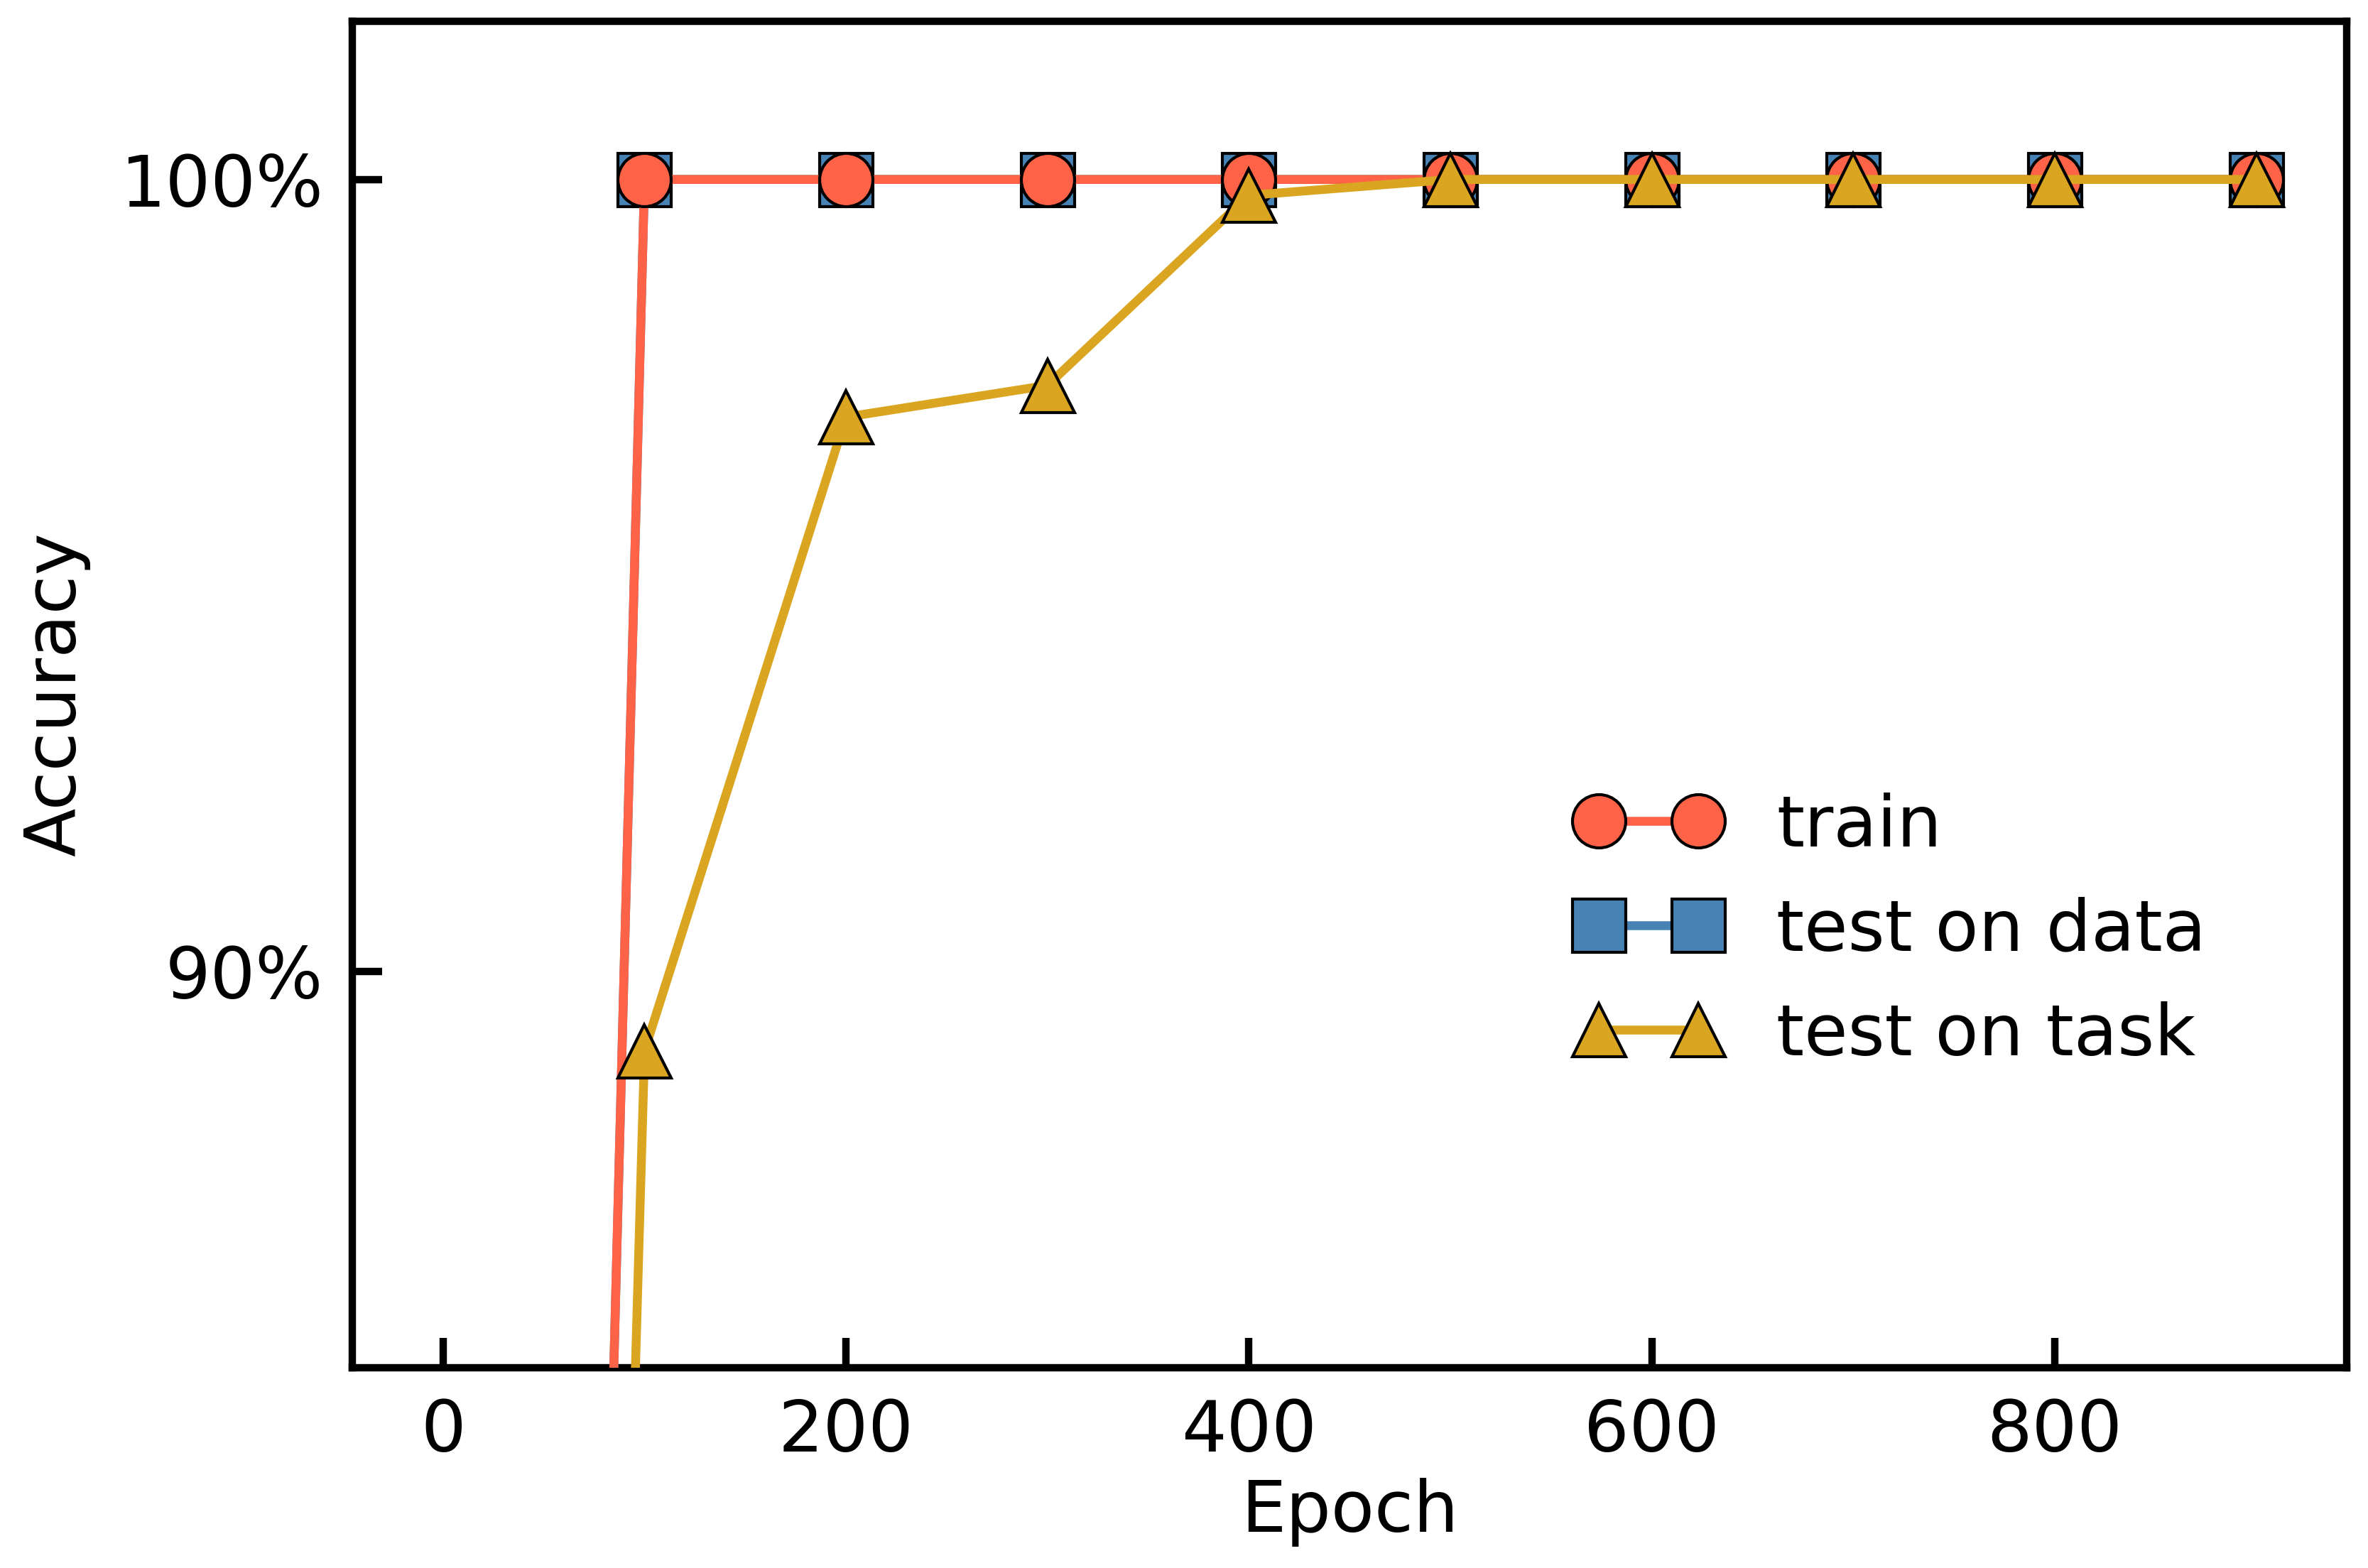

In [7]:
color_list = ['m', 'teal', 'magenta', 'c']

fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)



# train_loss_his = np.load(f'{working_dir}/loss/train_loss_his.npz')['train']
# test_loss_his = np.load(f'{working_dir}/loss/test_loss_his.npz')['test']

# acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')
# test_acc_his = np.load(f'{working_dir}/loss/test_acc_his.npz')['test']
# train_acc_his = np.load(f'{working_dir}/loss/train_acc_his.npz')['train']

color_list = ['tomato', 'steelblue', 'goldenrod']
ax = plt.gca()

# l1, = ax.semilogy(range(0, 1000, 10), train_loss[:100], label='train', color=color_list[0], linestyle='-', lw=3)
# l2, = ax.semilogy(range(0, 1000, 10),test_loss_test[:100], label='test on data', color=color_list[1], linestyle='-', lw=3)
# l2, = ax.semilogy(range(0, 1000, 10),test_loss_test_34[:100], label='test on task', color=color_list[2], linestyle='-', lw=3)
# 新开一个轴画acc
# ax2 = ax.twinx()

l4, = ax.plot(range(0, 1000, 100), train_acc[:10], label=f'train', lw=3, color=color_list[0],
               marker = 'o', markersize=18, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[0], zorder=6)
l5, = ax.plot(range(0, 1000, 100), test_acc_test[:10], label=f'test on data', lw=3, color=color_list[1],
               marker = 's', markersize=18, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[1], zorder=5)
l6, = ax.plot(range(0, 1000, 100), test_acc_test_34[:10], label=f'test on task', lw=3, color=color_list[2],
                marker = '^', markersize=18, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[2], zorder=6)


# 画legend
# l1, = ax.semilogy([], label='train', color=color_list[0], linestyle='-', lw=3)
# l2, = ax.semilogy([], label='test on data', color=color_list[1], linestyle='-', lw=3)
# l3, = ax.semilogy([], label='test on task', color=color_list[2], linestyle='-', lw=3)
# l3, = ax2.plot([], [], label=f'train acc', lw=3, color=color_list[0],
#                     marker = 'o', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[0], zorder=5)
# l4, = ax2.plot([], [], label=f'test acc', lw=3, color=color_list[1],
#                 marker = 's', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[1], zorder=5)

# legend
# plt.axvline(x=30, color='black', linestyle='--', lw=2)
handler_map = {}
# handler_map[l1] = HandlerLine2D()
# handler_map[l3] = HandlerLine2D(numpoints=2)
handler_map[l4] = HandlerLine2D(numpoints=2)
handler_map[l5] = HandlerLine2D(numpoints=2)
handler_map[l6] = HandlerLine2D(numpoints=2)
handles = [l4, l5, l6]

ax.legend(loc=(0.6,0.2), handles=handles, frameon=False, handler_map=handler_map)

# ax.set_yticks([1e0, 1e-4, 1e-8])
# ax.set_yticklabels(['1E+0', '1E-4', '1E-8'])

ax.set_yticks([0, 20, 40, 60,90, 100])
ax.set_ylim(85,102)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '90%', '100%'])

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylabel('Accuracy', labelpad=10)

# ax2.set_ylim(-0.05, 0.2)

plt.savefig(f'composition_inverse_one_trial.png')